<a href="https://colab.research.google.com/github/srishanth0803/Heart-Failure-Analysis/blob/main/heart_failure_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")

In [3]:
data.shape

(299, 13)

In [4]:
data.dtypes

,0
age,float64
anaemia,int64
creatinine_phosphokinase,int64
diabetes,int64
ejection_fraction,int64
high_blood_pressure,int64
platelets,float64
serum_creatinine,float64
serum_sodium,int64
sex,int64


In [5]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [6]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
data.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [8]:
max(data.ejection_fraction)

80

In [9]:
max(data.serum_creatinine)

9.4

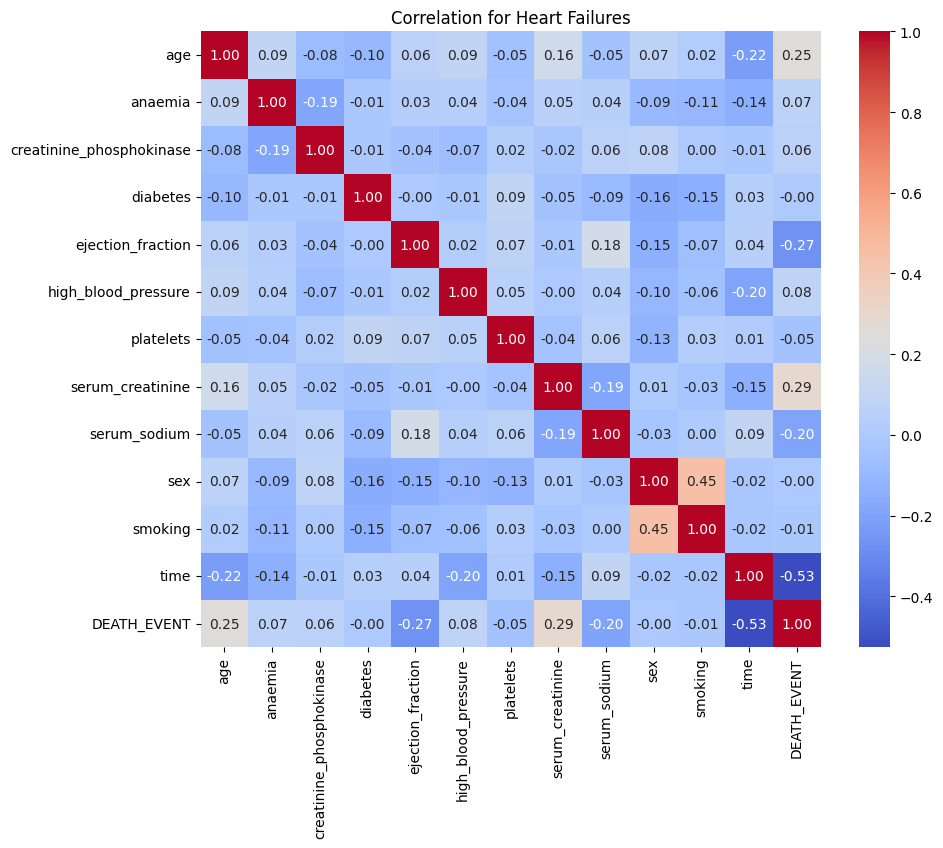

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation for Heart Failures")
plt.show()

In [11]:
for columns in data.columns:
  print(columns)

age
anaemia
creatinine_phosphokinase
diabetes
ejection_fraction
high_blood_pressure
platelets
serum_creatinine
serum_sodium
sex
smoking
time
DEATH_EVENT


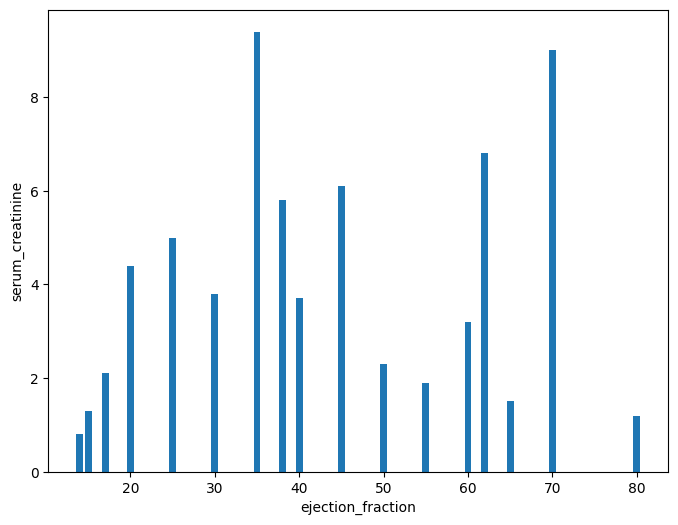

In [12]:
plt.figure(figsize=(8,6))
plt.bar(data.ejection_fraction,data.serum_creatinine)
plt.xlabel("ejection_fraction")
plt.ylabel("serum_creatinine")
plt.show()

In [13]:
import plotly.express as px
fig=px.histogram(data,x="DEATH_EVENT",color="sex",hover_data=data.columns,title="HEART DISEASES",barmode="group")
fig.show()

In [14]:
import plotly.graph_objects as go

male=data[data['sex']==1]
female=data[data['sex']==0]
male_survived=male[data['DEATH_EVENT']==1]
male_Notsurvived=male[data['DEATH_EVENT']==0]
female_survived=female[data['DEATH_EVENT']==1]
female_survived=female[data['DEATH_EVENT']==0]
labels=['male_survived','male_Notsurvived','female_survived','female_Notsurvived']
values=[len(male[data['DEATH_EVENT']==0]),len(male[data['DEATH_EVENT']==1]),len(female[data['DEATH_EVENT']==0]),len(female[data['DEATH_EVENT']==1])]
fig=go.Figure(data=[go.Pie(labels=labels,values=values,hole=0.5)])
fig.update_layout(
    title_text="Heart diseases"
)
fig.show()

/tmp/ipython-input-4164646043.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipython-input-4164646043.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipython-input-4164646043.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipython-input-4164646043.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipython-input-4164646043.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipython-input-4164646043.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipython-input-4164646043.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipython-input-4164646043.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



From the above piechart we able to know that more no.of males are survived from HEART DISEASES than female


In [15]:
import plotly.figure_factory as ff
hist_data=[data['age'].values]
group_labels=['age']
fig=ff.create_distplot(hist_data,group_labels=group_labels,bin_size=[2])
fig.update_layout(title_text="Heart Diseases based on AGE'S")
fig.show()

The disease is spreading between the age group of 40 and 85

In [16]:
surv=data[data['DEATH_EVENT']==1]['age']
not_surv=data[data['DEATH_EVENT']==0]['age']
hist_data=[surv,not_surv]
group_labels=['survived','not_survived']
fig=ff.create_distplot(hist_data,group_labels,bin_size=0.5)
fig.update_layout(title_text="Survivied vs Not_Survived based on AGE'S")
fig.show()

In [17]:
fig=px.histogram(data,x='ejection_fraction',color='DEATH_EVENT')
fig.show()

1=YES(not_survived)
0=NO(survived)

In [18]:
fig=px.histogram(data,x='serum_creatinine',color='DEATH_EVENT')
fig.show()

1=YES(not_survived) 0=NO(survived)

In [19]:
features=['time','ejection_fraction','serum_creatinine']
x=data[features]
y=data['DEATH_EVENT']
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=3
)

In [20]:
accuracy_list=[]

In [21]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
log_reg_pred=log_reg.predict(x_test)
log_reg_acc=accuracy_score(y_test,log_reg_pred)
accuracy_list.append(100*log_reg_acc)

In [22]:
!pip install colorama

In [23]:
from colorama import Fore
print(Fore.GREEN+"Accuracy of logistic regression : ","{:.2f}%".format(100*log_reg_acc))

Accuracy of logistic regression :  88.33%


 Cat Boost Classifier


In [24]:
!pip install catboost
from catboost import CatBoostClassifier
cat_a=CatBoostClassifier()
cat_a.fit(x_train,y_train)
cat_a_pred=cat_a.predict(x_test)
cat_a_acc=accuracy_score(y_test,cat_a_pred)
accuracy_list.append(100*cat_a_acc)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 MB 6.9 MB/s eta 0:00:00
Learning rate set to 0.005591
0:	learn: 0.6876331	total: 48.7ms	remaining: 48.7s
1:	learn: 0.6834304	total: 49.6ms	remaining: 24.8s
2:	learn: 0.6785006	total: 53.5ms	remaining: 17.8s
3:	learn: 0.6741625	total: 54.3ms	remaining: 13.5s
4:	learn: 0.6708600	total: 58ms	remaining: 11.5s
5:	learn: 0.6668809	total: 58.9ms	remaining: 9.75s
6:	learn: 0.6622961	total: 61.3ms	remaining: 8.69s
7:	learn: 0.6582034	total: 61.8ms	remaining: 7.67s
8:	learn: 0.6538726	total: 62.8ms	remaining: 6.92s
9:	learn: 0.6502834	total: 67.7ms	remaining: 6.7s
10:	learn: 0.6455967	total: 68.5ms	remaining: 6.16s
11:	learn: 0.6414409	total: 72.9ms	remaining: 6s
12:	learn: 0.6384614	total: 76.7ms	remaining: 5.82s
13:	learn: 0.6345990	total: 77.4ms	remaining: 5.45s
14:	learn: 0.6299886	total: 78.3ms	remaining: 5.14s
15:	learn: 0.6263992	total: 84ms	remaining: 5.16s
16:	learn: 0.6226402	total: 84.8ms	remaining: 4.9s
17:	learn: 0.6182159	total:

In [25]:
print(Fore.GREEN+"Accuracy of test data : ","{:.2f}%".format(100*cat_a_acc))

Accuracy of test data :  86.67%


Support Vector

In [26]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
svc_pred=svc.predict(x_test)
svc_acc=accuracy_score(y_test,svc_pred)
accuracy_list.append(100*svc_acc)


In [27]:
print(Fore.GREEN+"Accuracy of test data : ","{:.2f}%".format(100*svc_acc))

Accuracy of test data :  85.00%


KNN algorithm

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred=svc.predict(x_test)
knn_acc=accuracy_score(y_test,knn_pred)
accuracy_list.append(100*knn_acc)

In [29]:
print(Fore.GREEN+"Accuracy of test data : ","{:.2f}%".format(100*knn_acc))

Accuracy of test data :  85.00%


Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred=svc.predict(x_test)
dt_acc=accuracy_score(y_test,dt_pred)
accuracy_list.append(100*dt_acc)

In [31]:
print(Fore.GREEN+"Accuracy of test data : ","{:.2f}%".format(100*dt_acc))

Accuracy of test data :  85.00%


In [32]:
from sklearn.ensemble import RandomForestClassifier
dt=RandomForestClassifier()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
dt_acc=accuracy_score(y_test,dt_pred)
accuracy_list.append(100*dt_acc)

In [33]:
print(Fore.GREEN+"Accuracy of test data : ","{:.2f}%".format(100*dt_acc))

Accuracy of test data :  85.00%


Cat Boost Classifier

In [34]:
model_list = ['Logistic Regression', 'SVC','KNearestNeighbours', 'DecisionTree', 'RandomForest',
               'CatBoostClassifier']

/tmp/ipython-input-787730096.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




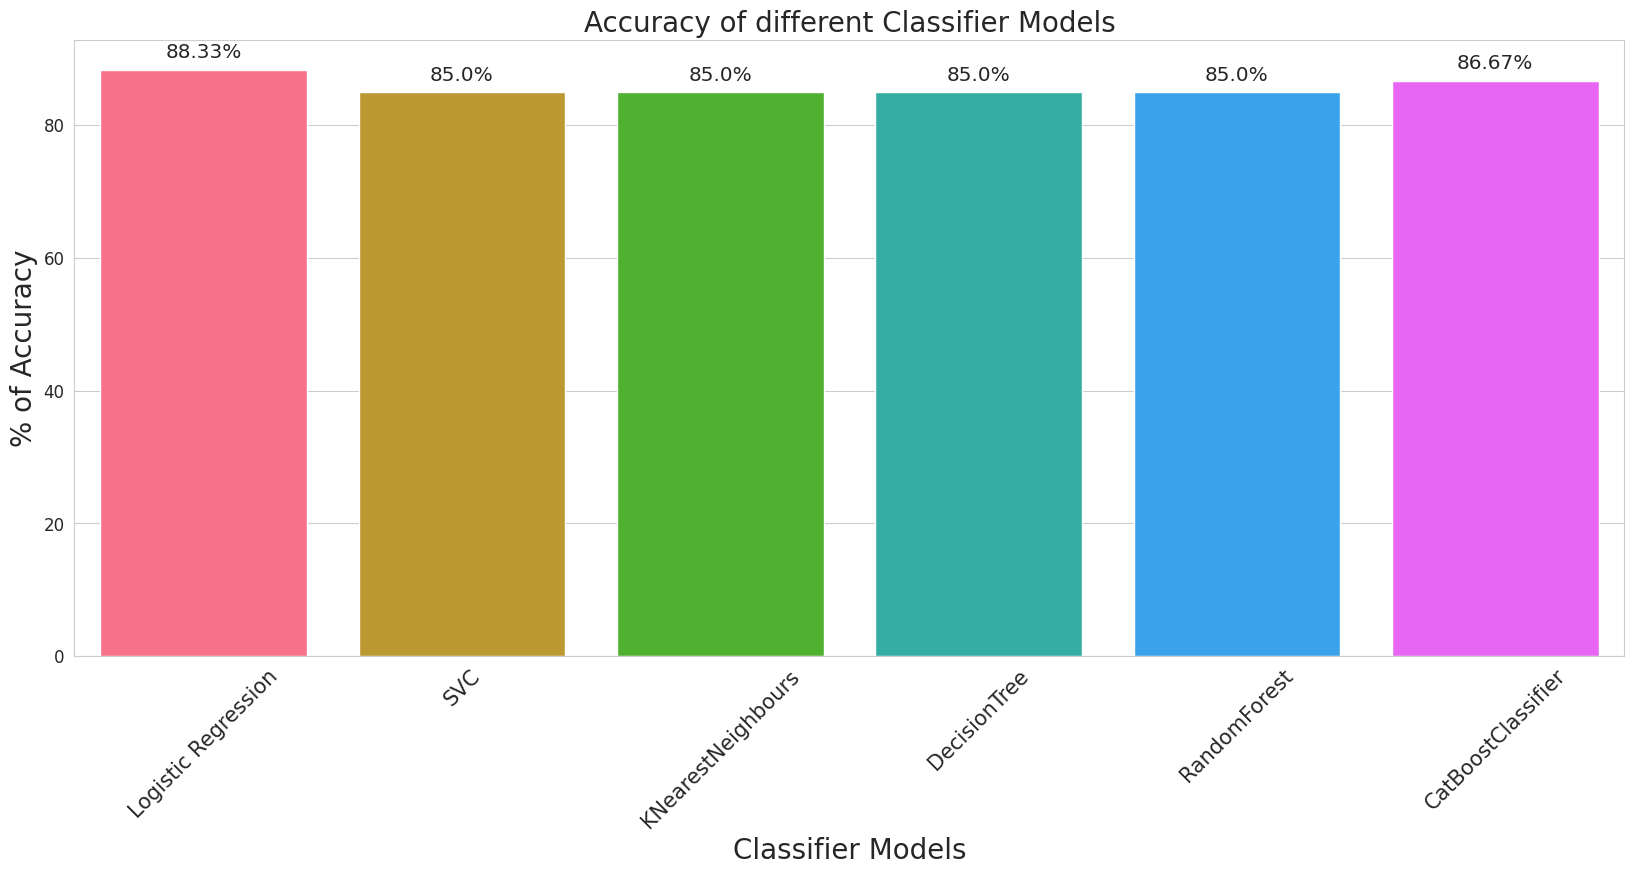

In [35]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('whitegrid')


accuracy_list = [
    log_reg_acc * 100,
    svc_acc * 100,
    knn_acc * 100,
    85.0,
    dt_acc * 100,
    cat_a_acc * 100

]

ax=sns.barplot(x=model_list,y=accuracy_list,palette="husl",saturation=2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(rotation=45,horizontalalignment="center",fontsize=15)
plt.yticks(fontsize=12)
for p in ax.patches:
  width, height = p.get_width(),p.get_height()
  x, y = p.get_xy()
  ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()